In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel


In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee (2).csv to employee (2).csv


In [21]:
df = pd.read_csv(open('employee (2).csv','rb'))


In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [23]:
df["exceeds_monthly_hours_threshold"] = np.where(df["average_montly_hours"] >= 160, 1, 0).astype(int)
df.exceeds_monthly_hours_threshold = df.exceeds_monthly_hours_threshold.astype('category')
df.left = df.left.astype("category")
df.number_project = df.number_project.astype("category")
df.time_spend_company = df.time_spend_company.astype("category")
df.Work_accident = df.Work_accident.astype("category")
df.promotion_last_5years = df.promotion_last_5years.astype("category")

In [24]:
Y = df['exceeds_monthly_hours_threshold'] # выбираем целевую переменную (категориальную)
X = df.drop('exceeds_monthly_hours_threshold', axis=1) # переменные для проверки влияния

In [25]:
X = X.drop('average_montly_hours', axis=1)

In [26]:
df.drop('average_montly_hours', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   satisfaction_level               14999 non-null  float64 
 1   last_evaluation                  14999 non-null  float64 
 2   number_project                   14999 non-null  category
 3   time_spend_company               14999 non-null  category
 4   Work_accident                    14999 non-null  category
 5   promotion_last_5years            14999 non-null  category
 6   department                       14999 non-null  object  
 7   salary                           14999 non-null  object  
 8   left                             14999 non-null  category
 9   exceeds_monthly_hours_threshold  14999 non-null  category
dtypes: category(6), float64(2), object(2)
memory usage: 557.8+ KB


In [27]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,exceeds_monthly_hours_threshold
0,0.38,0.53,2,157,3,0,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,0,support,low,1,1
14996,0.37,0.53,2,143,3,0,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,0,support,low,1,1


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  category
 3   time_spend_company     14999 non-null  category
 4   Work_accident          14999 non-null  category
 5   promotion_last_5years  14999 non-null  category
 6   department             14999 non-null  object  
 7   salary                 14999 non-null  object  
 8   left                   14999 non-null  category
dtypes: category(5), float64(2), object(2)
memory usage: 543.0+ KB


In [29]:
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category', 'object']).columns

X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [30]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.38,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.11,0.88,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.72,0.87,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.37,0.52,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [31]:
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

scaler = MinMaxScaler()

X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [32]:
 X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [33]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [34]:
 train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8027
Точность на тестовой выборке: 0.8033

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       841
           1       0.80      0.96      0.88      2159

    accuracy                           0.80      3000
   macro avg       0.80      0.68      0.70      3000
weighted avg       0.80      0.80      0.78      3000



LogisticRegression(max_iter=1000)

**Удаление на основе медианы**

In [35]:
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    X_numeric = X.select_dtypes(include=['float64'])

    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    IQR = Q3 - Q1

    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [36]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [37]:
X_processed.describe()

,satisfaction_level,last_evaluation
count,14999.000000,14999.000000
mean,0.574542,0.556409
std,0.273220,0.267452
min,0.000000,0.000000
25%,0.384615,0.312500
50%,0.604396,0.562500
75%,0.802198,0.796875
max,1.000000,1.000000


In [38]:
 X_iqr.describe()

,satisfaction_level,last_evaluation
count,14999.000000,14999.000000
mean,0.574542,0.556409
std,0.273220,0.267452
min,0.000000,0.000000
25%,0.384615,0.312500
50%,0.604396,0.562500
75%,0.802198,0.796875
max,1.000000,1.000000


In [39]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.7535
Точность на тестовой выборке: 0.7600

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.69      0.26      0.38       841
           1       0.77      0.96      0.85      2159

    accuracy                           0.76      3000
   macro avg       0.73      0.61      0.61      3000
weighted avg       0.75      0.76      0.72      3000



LogisticRegression(max_iter=1000)

Улучшение производительности модели — избыточные признаки могут создавать шум и снижать точность.
Повышение интерпретируемости — меньший набор признаков легче анализировать и объяснять.
Снижение вычислительной сложности — меньшее количество признаков ускоряет обучение и предсказание.

**В sklearn основные методы отбора признаков включают:**



Filter методы — основаны на статистических тестах, например, SelectKBest использует критерий, чтобы выбрать признаки с наибольшим вкладом.

Wrapper методы — оценивают модели на разных подмножествах признаков, например, рекурсивное исключение признаков (RFE).

Embedded методы — выполняют отбор признаков во время обучения модели, например, с помощью L1-регуляризации (Lasso).

Filter методы основаны на статистических свойствах данных и выбирают признаки, не учитывая алгоритм машинного обучения. Они работают как предварительный шаг перед обучением модели и быстро отбирают наиболее информативные признаки.

Преимущества:

Быстрые.

Не зависят от модели.

Уменьшают размерность данных до обучения.

Недостатки:

Не учитывают взаимодействие между признаками.
Могут упускать важные комбинации признаков.

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [41]:
selector = SelectKBest(score_func=chi2, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [46]:
selector.scores_

array([3.36313522e+01, 1.89232021e+02, 3.31040911e+01, 1.33179719e+02,
       1.83702071e+02, 1.41492809e+02, 8.88908367e+01, 4.50414028e+02,
       1.72961270e+02, 1.37131884e+02, 2.84965246e+01, 1.99289921e+00,
       6.45748324e-01, 9.09123974e-02, 6.40516041e+00, 4.54996483e-01,
       1.16240231e+00, 2.33838888e+00, 7.69489613e+00, 5.98521905e+00,
       1.05534594e+00, 2.23865654e+00, 4.60868225e-01, 6.11570045e-02,
       1.79419602e+00, 4.49324009e+00, 7.25728008e-01, 3.85688862e+02])

In [43]:
X_processed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project_3',
       'number_project_4', 'number_project_5', 'number_project_6',
       'number_project_7', 'time_spend_company_3', 'time_spend_company_4',
       'time_spend_company_5', 'time_spend_company_6', 'time_spend_company_7',
       'time_spend_company_8', 'time_spend_company_10', 'Work_accident_1',
       'promotion_last_5years_1', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium', 'left_1'],
      dtype='object')

In [47]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [56]:
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['last_evaluation', 'number_project_5', 'time_spend_company_3',
       'time_spend_company_4', 'left_1'],
      dtype='object')


In [57]:
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

In [58]:
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8043
Точность на тестовой выборке: 0.8097

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      0.37      0.52       841
           1       0.80      0.98      0.88      2159

    accuracy                           0.81      3000
   macro avg       0.84      0.68      0.70      3000
weighted avg       0.82      0.81      0.78      3000



LogisticRegression(max_iter=1000)

 satisfaction_level (Уровень удовлетворенности): Если человек недоволен своей работой, он, скорее всего, уволится. Этот показатель явно влияет на то, остается человек в компании или нет.

 last_evaluation (Последняя оценка): Люди, которые получили либо очень низкую, либо очень высокую оценку своей работы, могут быть склонны к увольнению: кто-то из-за недовольства, а кто-то потому, что хочет найти что-то лучше.

 number_project_5 (5 проектов): Если сотрудник занят в 5 проектах, это может как перегружать его, так и наоборот, мотивировать. Так или иначе, участие в таком количестве проектов оказалось важным фактором для увольнения.

 time_spend_company_3 (3 года в компании): Три года — это период, когда многие могут либо уйти на повышение, либо начать задумываться о смене работы. Этот срок в компании важен для предсказания увольнения

 .left_1 (Уволился или нет): Это сам факт увольнения, который напрямую связан с целевой переменной. Этот признак необходим для понимания того, кто уволился.

 Wrapper методы оценивают различные комбинации признаков, обучая модель на каждом подмножестве, и выбирают набор признаков, который дает наилучшее качество модели. Они учитывают взаимодействия между признаками, но могут быть вычислительно затратными.Преимущества:

Преимущества:

**Учитывают взаимодействия между признаками.
Могут улучшить производительность модели.**

Недостатки:

**Высокая вычислительная сложность.
Длительное время выполнения на больших наборах данных.**

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['number_project_3', 'number_project_4', 'number_project_5',
       'number_project_6', 'number_project_7'],
      dtype='object')


In [60]:
X_rfe = X_processed[selected_features]

In [61]:
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.7926
Точность на тестовой выборке: 0.7970

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       841
           1       0.81      0.94      0.87      2159

    accuracy                           0.80      3000
   macro avg       0.78      0.68      0.70      3000
weighted avg       0.79      0.80      0.78      3000



 Embedded методы

 **Преимущества**:

 Учитывают взаимодействия между признаками.Менее вычислительно затратны, чем Wrapper методы.

Интегрированы в процесс обучения.

**Недостатки**:

Зависимы от выбранной модели.

Могут не отбирать признаки, важные для других моделей.

Коэффициенты модели без регуляризации:
 [[ 0.73474034  1.50192896  1.35174639  1.51054709  1.6965842   2.28663863
   3.87391228 -0.30035365  0.24734525  0.43558525  0.21093784 -0.01044255
  -0.48517445 -0.4086172  -0.03902586 -0.0248974  -0.18183234 -0.27506829
  -0.28897893 -0.01274541 -0.17358581 -0.2867281  -0.12865101 -0.18401978
  -0.13632683 -0.11775148 -0.15745089 -0.47269651]]
Коэффициенты модели с регуляризацией:
 [[ 0.73761668  1.49437275  1.36395604  1.52349065  1.71186165  2.32012084
   4.36450412 -0.29873064  0.2321944   0.42733249  0.19801598  0.
  -0.45163003 -0.38825299 -0.03545025 -0.01375482 -0.1504557  -0.24598302
  -0.25661988  0.         -0.14245579 -0.25701479 -0.10155329 -0.15494847
  -0.10861756 -0.11650321 -0.15685504 -0.47109545]]
Отобранные признаки:
 Index(['satisfaction_level', 'last_evaluation', 'number_project_3',
       'number_project_4', 'number_project_5', 'number_project_6',
       'number_project_7', 'time_spend_company_3', 'time_spend_company_4',
 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


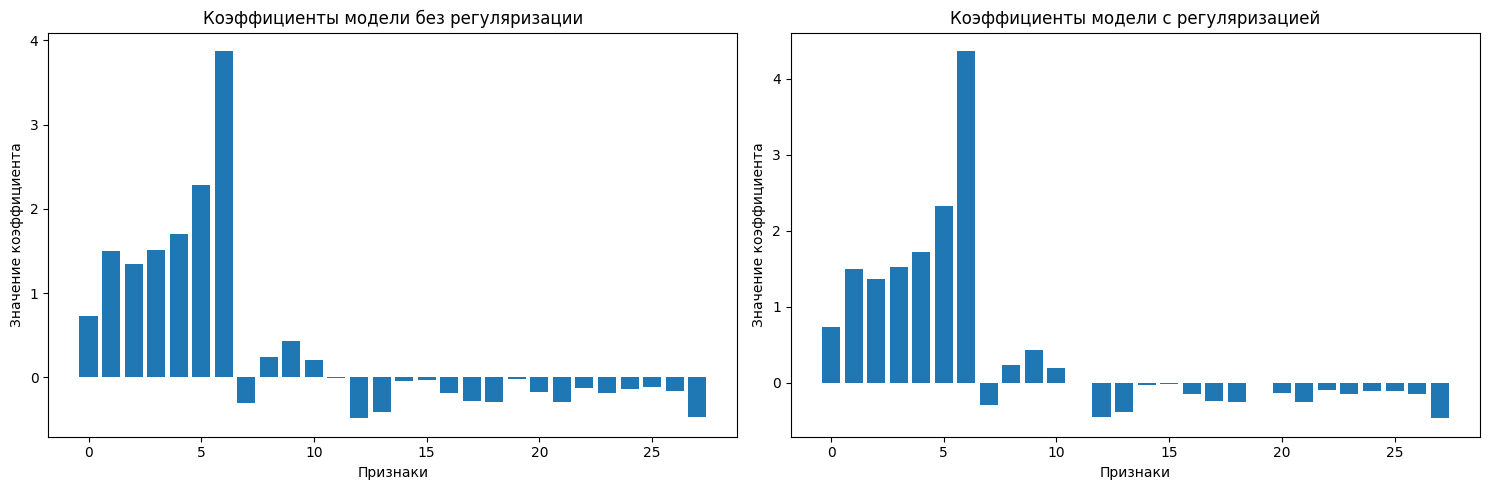

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:\n", coefficients_no_penalty)

model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

model_with_penalty.fit(X_processed, Y)

coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:\n", coefficients_with_penalty)

selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:\n", selected_features)

model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:\n", coefficients_embedded)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [64]:
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8025
Точность на тестовой выборке: 0.8037

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       841
           1       0.80      0.96      0.88      2159

    accuracy                           0.80      3000
   macro avg       0.80      0.68      0.70      3000
weighted avg       0.80      0.80      0.78      3000



In [65]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

base_model = LogisticRegression(max_iter=1000)

sfs = SequentialFeatureSelector(base_model, n_features_to_select=5, direction='forward')

sfs.fit(X_train, Y_train)

selected_features = X_processed.columns[sfs.get_support()]
print("Отобранные признаки:", selected_features)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_sfs, Y_train)

y_pred = model.predict(X_test_sfs)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, y_pred)
print(f"Точность модели с SequentialFeatureSelector: {accuracy}")

report = classification_report(Y_test, y_pred)
print("Классификационный отчет:\n", report)

Отобранные признаки: Index(['last_evaluation', 'number_project_4', 'time_spend_company_4',
       'time_spend_company_5', 'left_1'],
      dtype='object')
Точность модели с SequentialFeatureSelector: 0.812
Классификационный отчет:
               precision    recall  f1-score   support

           0       0.86      0.39      0.53       830
           1       0.81      0.98      0.88      2170

    accuracy                           0.81      3000
   macro avg       0.83      0.68      0.71      3000
weighted avg       0.82      0.81      0.79      3000



SequentialFeatureSelector отбирает признаки, оптимизируя качество модели на каждом шаге. Его преимущество — он учитывает как влияние отдельных признаков, так и их комбинаций

 ⏰ Основные признаки, которые влияют на результат, остаются одинаковыми

 Логистическая регрессияЛогистическая регрессия — это модель для задач бинарной классификации, которая предсказывает вероятность того, что наблюдение принадлежит к одному из двух классов (например, 0 или 1). Модель основана на линейной регрессии, но использует сигмоидную функцию активации для приведения предсказаний в диапазон от 0 до 1. Логистическая регрессия идеально подходит для задач, где нужно классифицировать данные на два класса.
Принцип работы логистической регрессии:

**Сначала вычисляется линейная комбинация признаков с весами:
y = b + w1 * x1 + w2 * x2 + w(n) * x(n), где**

x - переменные

w - веса

b - смещение

Затем результат линейной комбинации передается в сигмоидную функцию активации, которая преобразует результат в значение от 0 до 1.
Функция активации (Сигмоида)

Сигмоидная функция в логистической регрессии используется для преобразования линейной комбинации признаков в вероятность, что наблюдение относится к классу 1. Формула сигмоиды:

sigmoida = 1 / (1 + e^-y)

Она всегда возвращает значение в диапазоне от 0 до 1, что удобно для интерпретации как вероятность принадлежности к классу 1.

Принцип работы:

Инициализация весов: Изначально все веса устанавливаются в нули.

Градиентный спуск: На каждой итерации:

Вычисляется линейная комбинация признаков.
Применяется сигмоидная функция для предсказания вероятностей.
Градиенты вычисляются для обновления весов и смещения, минимизируя ошибку.


Предсказание: Для новых данных модель возвращает вероятность, которая затем конвертируется в классы 0 или 1.

In [66]:

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for idx_,_ in enumerate(range(self.iterations)):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        return [1 if i > 0.5 else 0 for i in y_pred]



X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


 5: Кросс-валидацияКросс-валидация — это метод оценки качества моделей машинного обучения, который помогает избежать переобучения и получить более надежную оценку. Она заключается в разделении данных на несколько частей и обучении модели на различных подмножествах данных, чтобы проверить ее способность обобщать на новых данных.

 Основные цели кросс-валидации:

 Проверить, насколько хорошо модель будет работать на новых данных. Определить, есть ли у модели проблемы с переобучением (overfitting) или недообучением (underfitting). Помочь выбрать наилучшую модель или гиперпараметры.
Виды кросс-валидации

**K-fold Cross-Validation:**

Данные делятся на K равных частей (folds). Модель обучается на K-1 частях и тестируется на оставшейся части. Процесс повторяется K раз, и результат — среднее качество по всем K итерациям. Этот метод позволяет эффективно использовать все данные как для обучения, так и для тестирования.

**ShuffleSplit:**

Этот метод несколько раз случайно перемешивает данные и делит их на тренировочные и тестовые выборки. В отличие от K-fold, здесь нет необходимости в разделении на фиксированное количество частей. Хорошо работает на небольших выборках данных и для оценки стабильности модели.

**Train-Test-Validation Split:**

Данные делятся на три части: тренировочные данные для обучения модели, тестовые данные для первичной оценки и валидационные данные для окончательной оценки. Полезен для задач, где требуется как тестирование, так и финальная проверка на отложенных данных.

In [67]:
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score


def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.8021869289763256
Точности по каждому фолду: [0.812, 0.799, 0.799, 0.797, 0.8039346448816272]


In [ ]:
def shuffle_split_cross_validation(X, y, n_splits=50, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

In [68]:
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


    model.fit(X_train_train, y_train_train)

    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.812
Точность на тестовых данных: 0.81125


**K-fold Cross-Validation:**
- Эффективно для четкого разделения данных для тренировки, настройки параметров и окончательной оценки.
- Подходит для больших наборов данных, где критична наличие отдельного тестового набора для финальной проверки.

**ShuffleSplit Cross-Validation:**
- Обеспечивает более точную оценку модели, особенно на небольших наборах данных.
- Используется для получения стабильной оценки на всех данных.

**Train-Test-Validation Split:**
- Подходит для небольших выборок, требующих многократного случайного перемешивания и тестирования модели.
- Помогает увидеть, как модель функционирует на различных случайных подмножествах данных.